# NBA Team Clustering Analysis Project

Within the NBA, there are many different types of team play styles. For instance, some teams focus on three point shooting, while others emphasize defense and rebounding. The goal of this project is to use dimensionality reduction and K-means clustering analysis to identify distinct clusters of different team play styles throughout the NBA. Furthermore, by comparing the different play styles with total wins within the league, it is possible to see whether there is a dominant team play style or set of styles in the NBA. Finally, by performing this analysis on historical data dating back to the 1976 season (first season after the merger between the ABA and NBA), it is possible to identify trends in how the play style of the league as a whole has shifted over time.

Creators: Karthik Guruvayurappan and Akshay Gopalkrishnan

Data Source: basketball-reference.com

In [1]:
# import necessary packages for data analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model

In [2]:
pd.set_option('min_rows', 100)
pd.set_option('max_rows', 100)

### Formatting Datasets from basketball-reference.com into Dictionary

This cell formats all of the datasets collected from basketball-reference.com into a dictionary format. To access the datasets, the keys are in the format: 'Year Type'. The datasets are read in as pandas DataFrames

Available Years Include: 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019

Available Dataset Types Include: Team, Opponent, Misc, Standings

A sample statement to access a dataset would be: team_2019 = datasets['2019 Team']

In [4]:
# create a list to hold all dataset names
dataset_list = []

# adds all CSV files from the datasets folder to a list
for dataset in os.listdir('./Datasets'):
    if (dataset.endswith('.csv')):
        dataset_list.append(dataset)

# adds all datasets to a dictionary with the key being 'Year Type' 
datasets = {}
for dataset in dataset_list:
    data_file = pd.read_csv('./Datasets/' + dataset)
    dataset_name = dataset[dataset.index('- ') + 1 : dataset.index('.')].strip()
    datasets[dataset_name] = data_file

### Exploratory Data Analysis



In [5]:
# define function to perform linear regression with data columns
def linear_regression(data, stat_one, stat_two):
    stat_x = data[stat_one].to_numpy().reshape(-1 ,1)
    stat_y = data[stat_two].to_numpy()
    lin_reg = LinearRegression().fit(stat_x, stat_y)
    sns.lmplot(x=stat_one, y=stat_two, data=data)
    corr_coeff = pearsonr(data[stat_one].to_numpy(), stat_y)
    print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
    print('Correlation Coefficient: ' + str(corr_coeff[0]))

In [158]:
team_2019 = datasets['2019 Team']
team_2019.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1


Regression Coefficient: 0.9068932865452393
Correlation Coefficient: 0.7186039777843883


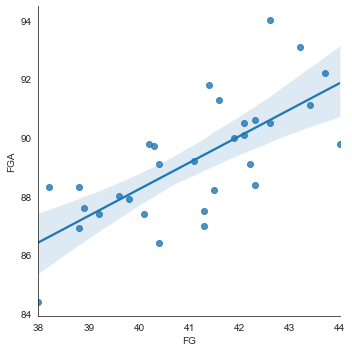

In [159]:
# plot FG against FGA for 2019 Team Data
linear_regression(team_2019, 'FG', 'FGA')

Regression Coefficient: 0.00651197950235929
Correlation Coefficient: 0.8227110723565924


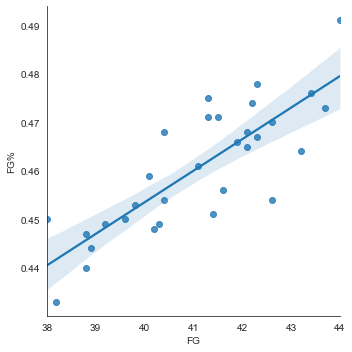

In [160]:
# plot FG against FG% for 2019 Team Data
linear_regression(team_2019, 'FG', 'FG%')

Regression Coefficient: 0.0012359674059123007
Correlation Coefficient: 0.19706427751947828


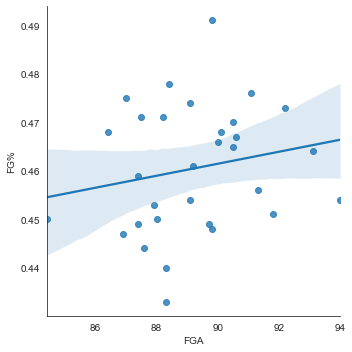

In [161]:
# plot FGA against FG% for 2019 Team Data
linear_regression(team_2019, 'FGA', 'FG%')

Regression Coefficient: 2.7204858228416833
Correlation Coefficient: 0.9546820957860316


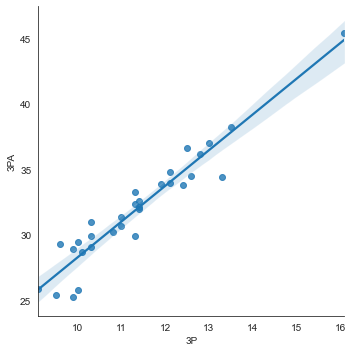

In [162]:
# plot 3P against 3PA for 2019 Team Data
linear_regression(team_2019, '3P', '3PA')

Regression Coefficient: 0.0007309318929900512
Correlation Coefficient: 0.07199849961839559


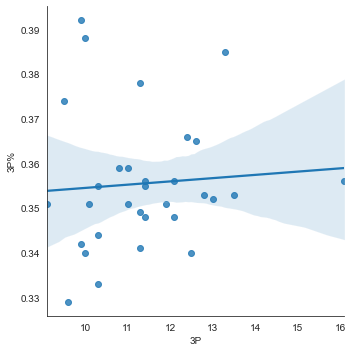

In [163]:
# plot 3P against 3P% for 2019 Team Data
linear_regression(team_2019, '3P', '3P%')

Regression Coefficient: -0.0008018528074170016
Correlation Coefficient: -0.22507583888769397


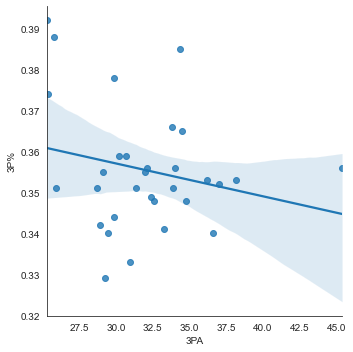

In [164]:
# plot 3PA against 3P% for 2019 Team Data
linear_regression(team_2019, '3PA', '3P%')

Regression Coefficient: 1.1618018926466025
Correlation Coefficient: 0.9056437705724992


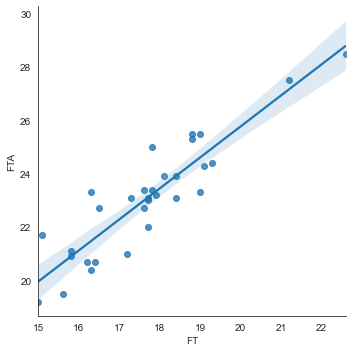

In [165]:
# plot FT against FTA for 2019 Team Data
linear_regression(team_2019, 'FT', 'FTA')

Regression Coefficient: 0.004022339435308713
Correlation Coefficient: 0.21157532321076095


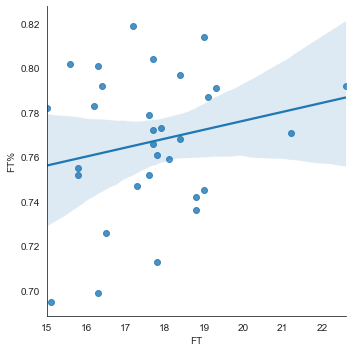

In [166]:
# plot FT against FT% for 2019 Team Data
linear_regression(team_2019, 'FT', 'FT%')

Regression Coefficient: -0.0032791768593015778
Correlation Coefficient: -0.22127166925601113


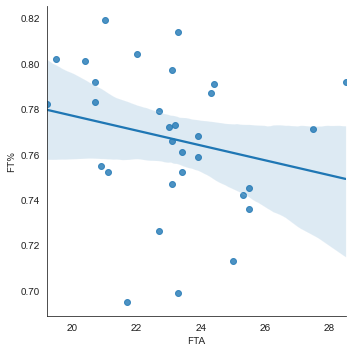

In [167]:
# plot FTA against FT% for 2019 Team Data
linear_regression(team_2019, 'FTA', 'FT%')

Regression Coefficient: 106.55227596017066
Correlation Coefficient: 0.6487666347472236


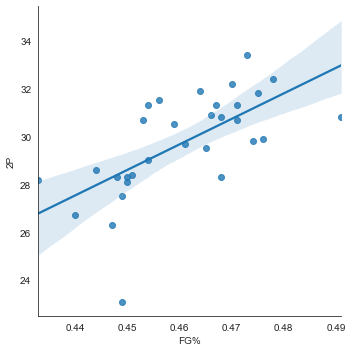

In [168]:
# plot FG% against 2P for 2019 Team Data
linear_regression(team_2019, 'FG%', '2P')

Regression Coefficient: 92.61328998171089
Correlation Coefficient: 0.27042550528265547


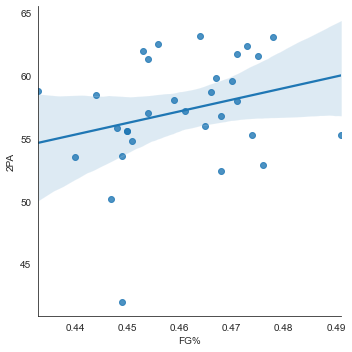

In [169]:
# plot FG% against 2P for 2019 Team Data
linear_regression(team_2019, 'FG%', '2PA')

Regression Coefficient: 1.0253695895143273
Correlation Coefficient: 0.6722072417285532


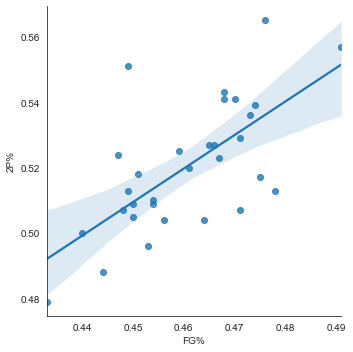

In [170]:
# plot FG% against 2P% for 2019 Team Data
linear_regression(team_2019, 'FG%', '2P%')

Regression Coefficient: 1.1213520291837662
Correlation Coefficient: 0.5247338303097445


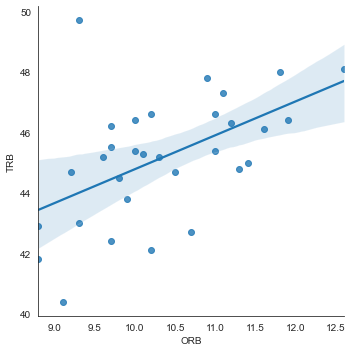

In [171]:
# plot ORB against TRB for 2019 Team Data
linear_regression(team_2019, 'ORB', 'TRB')

Regression Coefficient: 1.033604783715708
Correlation Coefficient: 0.8839580474966036


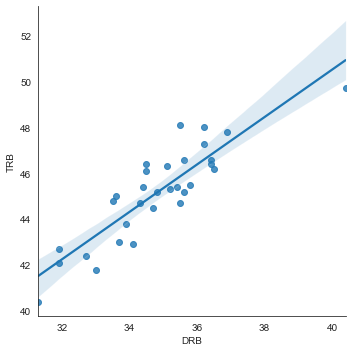

In [172]:
# plot DRB against TRB for 2019 Team Data
linear_regression(team_2019, 'DRB', 'TRB')

Regression Coefficient: 0.12080483356133173
Correlation Coefficient: 0.06610042615114779


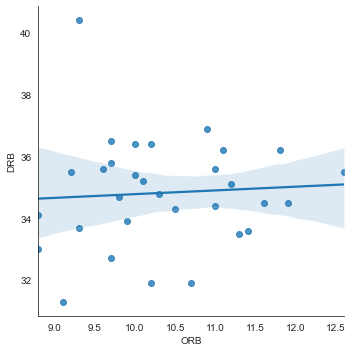

In [173]:
# plot ORB against DRB for 2019 Team Data
linear_regression(team_2019, 'ORB', 'DRB')

### Data Cleaning and Aggregation

In [7]:
def aggregate_data(stat_types , stats):
    
    np_datasets =  {} ##this will be a dictionary of arrays

    for key in sorted (datasets.keys()): 
        if key[5:len(key)] in stat_types:
            season_data = datasets[key]
            if key[0:4] in np_datasets:
                np_datasets[key[0:4]] = pd.merge(np_datasets[key[0:4]], season_data, on = ['Team'])
            else:
                np_datasets[key[0:4]] = season_data

    ## Adds the year to team name to provide unique identification to each team      
    team_data = {}
    for key in np_datasets:

            for index in np_datasets[key].index:
                if 'League Average' not in np_datasets[key].loc[index, 'Team']:
                    team_key = np_datasets[key].loc[index, 'Team'] + " " + key
                    team_data[team_key] = np_datasets[key].loc[index,:]


    agg_data = pd.DataFrame.from_dict(team_data, orient='index')
    agg_data = agg_data.loc[:, stats]
    
    
    return agg_data

In [60]:
agg_data = aggregate_data(['Team', 'Misc'], ['2PA', '3PA', 'PTS', 'Pace'])
agg_data_d = aggregate_data(['Team'], ['TRB', 'STL', 'BLK', 'PF'])

### Helper Functions for K-Means Analysis

In [61]:
def complete_k_means(dataset, n_clusters, n_components = 2):
    PCA_components = perform_PCA(dataset, n_components)
    plot_inertia(PCA_components)
    kmeans_labels = show_clusters(PCA_components, n_clusters)
    labels_df = print_labels(dataset, kmeans_labels)
    print(labels_df)
    show_cluster_averages(dataset, n_clusters)

In [62]:
def perform_PCA(data, n_components):
    data_std = StandardScaler().fit_transform(data)
    pca = PCA(n_components = n_components)
    data_pca = pca.fit_transform(data_std)
    PCA_components = pd.DataFrame(data_pca)
    return PCA_components

In [63]:
def plot_inertia(PCA_components):
    ks = range(1, 10)
    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(PCA_components.iloc[:,:3])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    #Plotting graph to find the elbow point for K-means
    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [64]:
def show_clusters(pca_data, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters).fit(pca_data)
    kmeans_predictions = kmeans.predict(pca_data)
    
    # plot cluster centers
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1])
    
    # plot data color coded based on cluster
    sns.scatterplot(x=pca_data.iloc[:, 0], y=pca_data.iloc[:, 1], hue=kmeans_predictions, palette='Pastel1')
    return kmeans.labels_

In [65]:
def print_labels(dataset, kmeans_labels):
    dataset['Cluster #'] = kmeans_labels
    return dataset

In [66]:
def show_cluster_averages(dataset, n_clusters):
    cluster_dict = {}
    for cluster_num in range(n_clusters):
        cluster_arr = []
        for index in dataset.index:
            if dataset.loc[index, 'Cluster #'] == cluster_num:
                cluster_arr.append(dataset.loc[index, :])
        cluster_averages = np.sum(cluster_arr, axis = 0)/len(cluster_arr)
        cluster_averages = np.delete(cluster_averages, len(cluster_averages)-1)
        cluster_dict["Cluster # " + str(cluster_num)] = cluster_averages
    cluster_df = pd.DataFrame.from_dict(cluster_dict, orient='index')
    dataset = dataset.drop(['Cluster #'], axis = 1)
    cluster_df.columns = dataset.columns
    print(cluster_df)

### Sample K-Means Analysis

In [67]:
# isolate necessary features from the Team 2019 dataset
team_2019_features = team_2019.drop(['Team', 'Rk', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P%', '3PA', 'FT', 'FTA', 'FT%', '2P', '2P%', 'DRB', 'PF', 'TOV', '2PA'], axis=1)
team_2019_features.head()

NameError: name 'team_2019' is not defined

In [68]:
# generate sample Kmeans using 2019 Team Data
complete_k_means(team_2019_features, 3)

NameError: name 'team_2019_features' is not defined

### Analysis

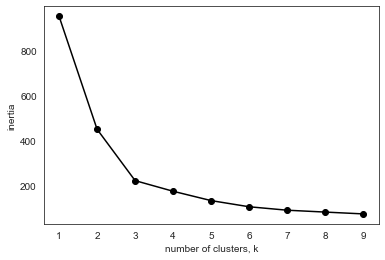

                               2PA   3PA    PTS   Pace  Cluster #
Boston Celtics* 1980          84.9   5.1  113.5  102.6          1
Los Angeles Lakers* 1980      88.6   1.2  115.1  104.1          1
Seattle SuperSonics* 1980     90.0   2.3  108.5  101.8          1
Philadelphia 76ers* 1980      85.7   1.5  109.1  103.0          1
Milwaukee Bucks* 1980         90.2   1.9  110.1  102.4          1
Phoenix Suns* 1980            84.8   3.4  111.1  104.8          1
Atlanta Hawks* 1980           84.8   0.9  104.5   98.9          1
Kansas City Kings* 1980       89.9   1.4  108.0  103.2          1
Cleveland Cavaliers 1980      95.8   2.3  114.1  105.6          1
Houston Rockets* 1980         86.8   4.6  110.8  101.2          1
San Antonio Spurs* 1980       91.9   2.5  119.4  109.5          1
Indiana Pacers 1980           89.9   3.8  111.2  104.4          1
Portland Trail Blazers* 1980  85.8   1.6  102.5   98.6          1
New York Knicks 1980          91.2   2.3  114.0  106.5          1
New Jersey

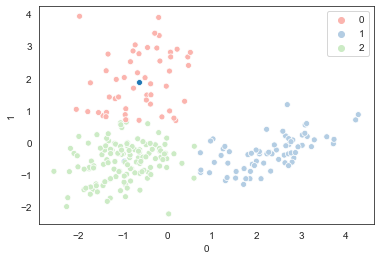

In [69]:
complete_k_means(agg_data, 3)

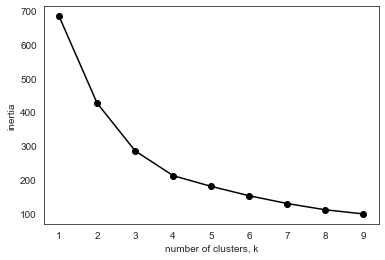

                               TRB   STL  BLK    PF  Cluster #
San Antonio Spurs* 1980       44.7   9.4  4.1  25.6          1
Los Angeles Lakers* 1980      45.6   9.4  6.7  21.8          1
Cleveland Cavaliers 1980      45.0   9.3  4.2  23.6          1
New York Knicks 1980          43.2  10.7  5.6  26.4          1
Boston Celtics* 1980          44.9   9.9  3.8  24.1          1
Indiana Pacers 1980           45.4  11.0  6.5  24.1          1
Phoenix Suns* 1980            43.0  11.1  4.2  22.6          1
Houston Rockets* 1980         44.0   9.5  4.5  23.5          1
Milwaukee Bucks* 1980         44.4   9.5  6.2  23.6          1
Philadelphia 76ers* 1980      46.6   9.7  8.0  22.7          1
Detroit Pistons 1980          44.4   9.5  6.9  25.2          1
Seattle SuperSonics* 1980     47.9   9.1  5.2  22.7          1
New Jersey Nets 1980          45.9  10.6  7.1  26.6          1
Denver Nuggets 1980           46.8   9.1  4.9  23.4          1
Kansas City Kings* 1980       44.1  10.5  4.3  26.0    

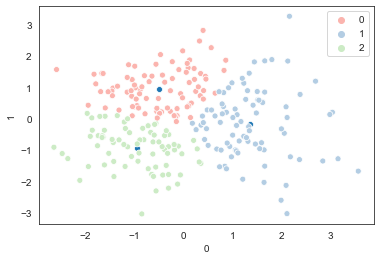

In [70]:
complete_k_means(agg_data_d, 3)

### Scratch Code Work

To-dos 
- Inertia
- Feature Selection Algorithm
- Defensive Clustering
- 2019 Team Data Analysis - Identify Team Types
- 2015 Team Data Analysis - Identify Team Types